In [16]:
%matplotlib inline
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Embedding, Conv1D, Flatten, MaxPooling1D
from pandas.plotting import scatter_matrix 
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import cohen_kappa_score
from tensorflow.keras.optimizers import Adam
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from keras.preprocessing import image
from keras.datasets import imdb
from sklearn.metrics import classification_report
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, classification_report

Загрузим и разобъём датасет IMDB

In [17]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=20000)
word_index = imdb.get_word_index()

max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [27]:
input_dim = 100
encoding_dim = 64

input_layer = Input(shape=(input_dim,))

encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)


autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True)
data_transformed = encoder.predict(X_train)
data_transformed = encoder.predict(X_test)


In [30]:
model_dense = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=max_len),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_dense.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_cnn = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=max_len),
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(max_len, encoding_dim)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Выполним обучение полносвязной модели

In [24]:
history = model_dense.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6671 - loss: 0.5727 - val_accuracy: 0.8468 - val_loss: 0.3526
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9741 - loss: 0.0862 - val_accuracy: 0.8120 - val_loss: 0.4775
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9996 - loss: 0.0056 - val_accuracy: 0.8223 - val_loss: 0.5503
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 1.0000 - loss: 8.5136e-04 - val_accuracy: 0.8230 - val_loss: 0.5761
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 1.0000 - loss: 2.4405e-04 - val_accuracy: 0.8250 - val_loss: 0.5913
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 1.0000 - loss: 1.6541e-04 - val_accuracy: 0.8253 - val_loss: 0.6039
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 1.0000 - loss: 1.1058e-04 - val_accuracy: 0.8260 - val_loss: 0.6145
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 1.0000 - loss: 

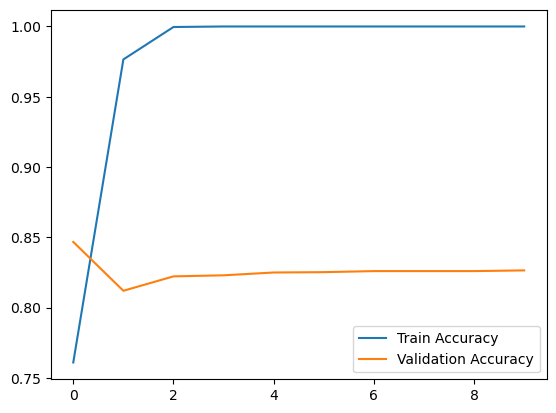

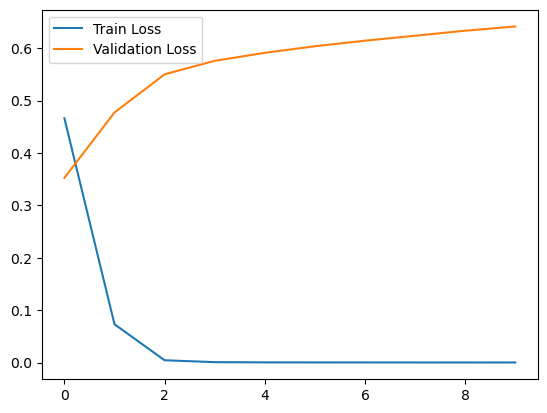

In [25]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

Выполним обучение сверточной модели

In [31]:
history_cnn = model_cnn.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.5933 - loss: 0.6348 - val_accuracy: 0.8472 - val_loss: 0.3483
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9149 - loss: 0.2293 - val_accuracy: 0.8468 - val_loss: 0.3529
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9703 - loss: 0.1021 - val_accuracy: 0.8462 - val_loss: 0.4156
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9941 - loss: 0.0337 - val_accuracy: 0.8462 - val_loss: 0.5141
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9996 - loss: 0.0095 - val_accuracy: 0.8390 - val_loss: 0.6224
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.8455 - val_loss: 0.6610
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.8445 - val_loss: 0.7064
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 1.0000 - loss: 7.5967e-04 - val_

In [33]:
y_pred = (model_cnn.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     12500
           1       0.84      0.82      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



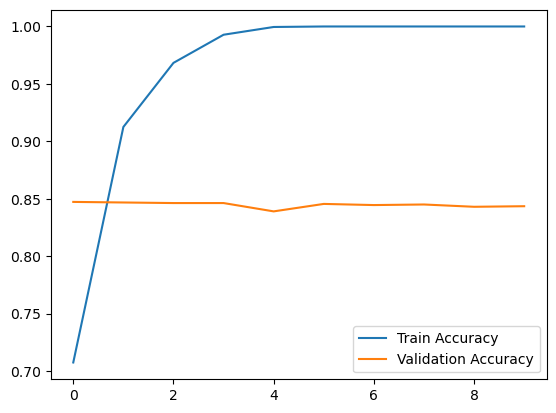

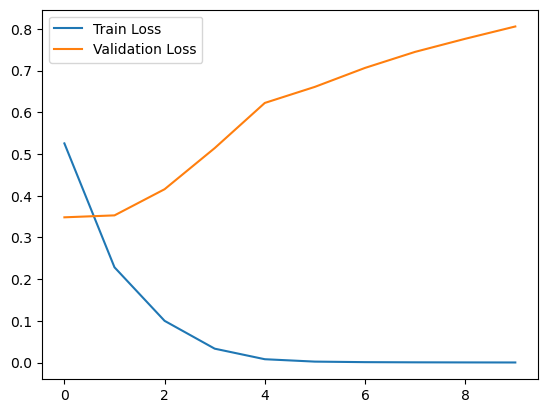

In [34]:
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

Сравним метрики F1, Loss, Accurancy для получившихся моделей

In [37]:
y_pred = (model_dense.predict(X_test) > 0.5).astype("int32")
y_pred_cnn = (model_cnn.predict(X_test) > 0.5).astype("int32")
acc = model_dense.evaluate(X_test, y_test)
acc_cnn = model_cnn.evaluate(X_test, y_test)
f1 = f1_score(y_test, y_pred)
f1_cnn = f1_score(y_test, y_pred_cnn)
print(f"F1 CNN: {f1_cnn}, F1 Dense: {f1}")
print(f"Accurancy CNN: {acc_cnn[1]}, Accurancy Dense: {acc[1]}")
print(f"Loss CNN: {acc_cnn[0]}, Loss Dense: {acc[0]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8279 - loss: 0.6747
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8307 - loss: 0.8248
F1 CNN: 0.8285252525252526, F1 Dense: 0.8282279643755741
Accurancy CNN: 0.83024001121521, Accurancy Dense: 0.8279600143432617
Loss CNN: 0.8204784989356995, Loss Dense: 0.6675697565078735


Результат сверточной модели лучше полносвязной